In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Chara\Downloads\archive (1)\Salary Data.csv")
df


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [5]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
sns.heatmap(df.corr(), annot=True)


ModuleNotFoundError: No module named 'seaborn'

In [7]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ValueError: could not convert string to float: 'Male'

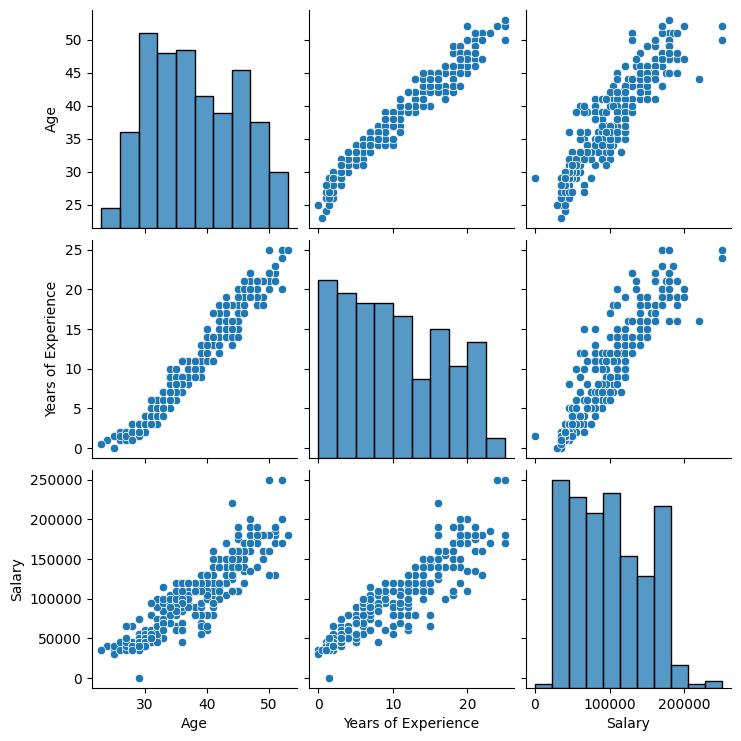

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
sns.heatmap(df.corr(), annot=True)


In [9]:
df = pd.get_dummies(df, drop_first=True)


In [10]:
X = df.drop('Salary', axis=1)  # Features
y = df['Salary']               # Target


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [13]:
X_train = X_train.dropna()
X_test = X_test.dropna()
y_train = y_train.loc[X_train.index]  # Align with X_train
y_test = y_test.loc[X_test.index]


In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.8519917732782869
MSE: 363393171.4076129


In [16]:
sample = X_test.iloc[0:1]
predicted_salary = model.predict(sample)
print("Predicted Salary:", predicted_salary[0])


Predicted Salary: 140227.22995369177


In [17]:
print(X_test.iloc[0])  # input features
print(y_test.iloc[0])  # actual salary (to compare)


Age                            46.0
Years of Experience            18.0
Gender_Male                    True
Education Level_Master's      False
Education Level_PhD            True
                              ...  
Job Title_UX Designer         False
Job Title_UX Researcher       False
Job Title_VP of Finance       False
Job Title_VP of Operations    False
Job Title_Web Developer       False
Name: 167, Length: 178, dtype: object
150000.0


In [19]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


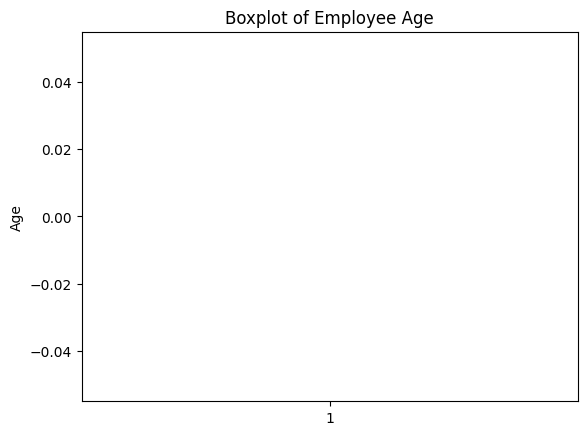

In [20]:
import matplotlib.pyplot as plt

plt.boxplot(df['Age'])  # capital 'A' in 'Age'
plt.title('Boxplot of Employee Age')
plt.ylabel('Age')
plt.show()


In [21]:
df = df[(df['Age'] <= 75) & (df['Age'] >= 17)]


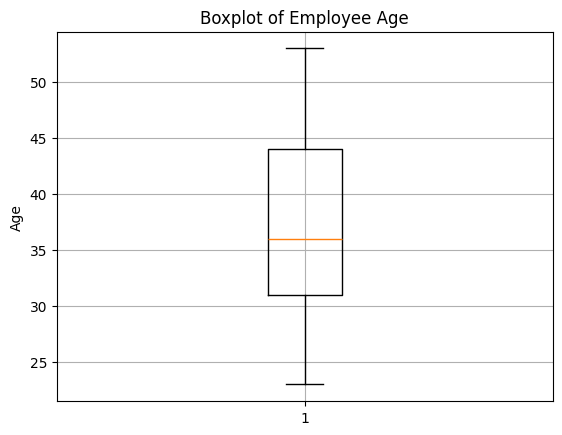

In [22]:

plt.boxplot(df['Age'])  # use 'df' and 'Age' with capital A
plt.title('Boxplot of Employee Age')
plt.ylabel('Age')
plt.grid(True)
plt.show()


In [23]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.8867431315452815
MSE: 278070844.5945946


In [24]:
sample = X_test.iloc[0:1]
predicted_salary = model.predict(sample)
print("Predicted Salary:", predicted_salary[0])


Predicted Salary: 158500.0
